In [1]:
import os
import sys

sys.path.append('..')
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

import torch
import numpy as np
import random
import pylab as plt
import tqdm

from coronal_diffusion import dataset
from coronal_diffusion import visualization_tools as vt
from coronal_diffusion import sampler

import config

/home/dedasilv/.micromamba/envs/coronal-diffusion-modeling/lib/python3.11/site-packages/ai/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
def set_seeds(seed):
    torch.use_deterministic_algorithms(True)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [3]:
os.chdir('..')
print('Current directory is:', os.getcwd())

Current directory is: /home/dedasilv/coronal-diffusion-modeling


In [16]:
plot_dir = 'plots/current-sheets/'
weights_file = "checkpoints/experiment14-refactor-alldata_2.pth"
tasks = [
    (0, 'min', config.seed_helper_min),
    (1, 'max', config.seed_helper_max)
]

!rm -rf $plot_dir
!mkdir -p $plot_dir

Solar max: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:04<00:00,  8.04s/it]


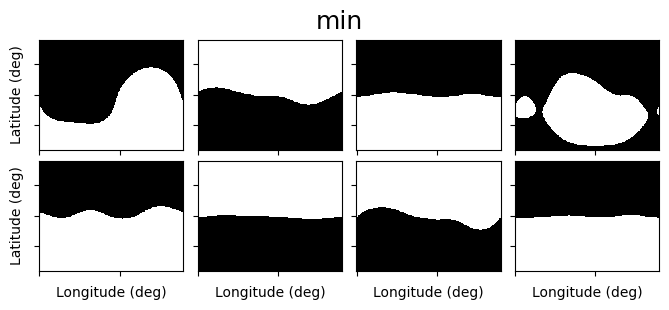

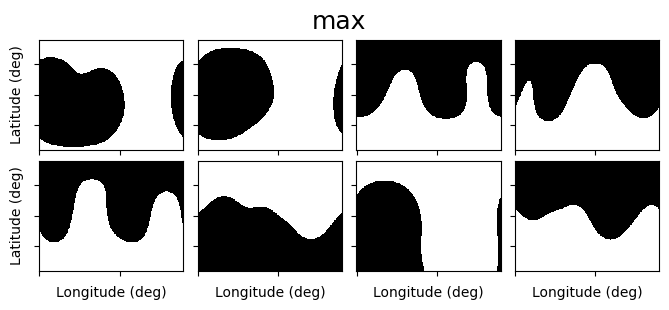

In [19]:
for radio_flux, tag, seed_helper in tasks:
    fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(8, 3))
    axes_orig = axes
    axes = axes.flatten()
    nitems = len(axes)
    
    for i in tqdm.tqdm(list(range(nitems)), desc=f'Solar {tag}'):
        set_seeds(i)
    
        G, H = sampler.sample(
            weights_file=weights_file,
            radio_flux=radio_flux,
            method='ddim',
            seed_helper=seed_helper,
        )
    
        sh = vt.SHVisualizer(G, H)
        sh.plot_current_sheet(ax=axes[i])

        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])

    for ax in axes_orig[-1, :]:
        ax.set_xlabel('Longitude (deg)')
    for ax in axes_orig[:, 0]:
        ax.set_ylabel('Latitude (deg)')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.suptitle(tag, fontsize=18)
    plt.savefig(f'{plot_dir}/currentsheet_{tag}.png', dpi=200, bbox_inches='tight')